In [1]:
# Imports
from datetime import datetime
import pandas as pd

### Loading Datasets

In [2]:
# file path
file_path="C:/Users/Davie/Desktop/introduction-to-power-bi/Accenture"

In [3]:
#load demographic data
content=pd.read_csv(file_path+"/Content.csv")

In [4]:
#load customer address
reactions=pd.read_csv(file_path+"/Reactions.csv")

In [5]:
#load transaction data
reaction_type=pd.read_csv(file_path+"/ReactionTypes.csv")

### Programmatic Assessment

In [6]:
# Content dataset
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [7]:
# Shape
content.shape

(1000, 6)

In [8]:
# Drop UserId and URL
content=content.loc[:,['Content ID','Type', 'Category']]

In [9]:
content['Category'].value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

In [10]:
# Reactions Dataset
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [11]:
# Shape
reactions.shape

(25553, 5)

In [12]:
# Select important features
reactions=reactions.loc[:,['Content ID','Type', 'Datetime']]

In [13]:
# Check missing values
reactions.isna().sum()

Content ID      0
Type          980
Datetime        0
dtype: int64

In [14]:
# Check Duplicates
reactions[reactions.duplicated()]

,Content ID,Type,Datetime


In [15]:
# Reaction Type
reaction_type.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [16]:
# Shape
reaction_type.shape

(16, 4)

In [17]:
# Select important features
reaction_type=reaction_type.loc[:,['Type','Sentiment', 'Score']]

In [18]:
# Check missing values
reaction_type.isna().sum()

Type         0
Sentiment    0
Score        0
dtype: int64

In [19]:
# Check Duplicates
reaction_type[reaction_type.duplicated()]

,Type,Sentiment,Score


### Cleaning 

In [20]:
# Change categories to small letters
content['Category']=content['Category'].apply(lambda x: x.lower())


In [21]:
# Check
content['Category'].value_counts()

Category
technology           72
animals              71
travel               69
science              67
fitness              66
culture              64
food                 63
healthy eating       62
soccer               61
cooking              60
education            59
tennis               58
studying             57
dogs                 56
veganism             49
public speaking      49
"culture"             3
"soccer"              3
"dogs"                2
"studying"            1
"animals"             1
"tennis"              1
"food"                1
"technology"          1
"cooking"             1
"public speaking"     1
"veganism"            1
"science"             1
Name: count, dtype: int64

In [22]:
# Remove " from the categories
content['Category']=content['Category'].apply(lambda x: x.strip('"'))

In [23]:
content.rename(columns={'Type':'ContentType'}, inplace=True)

In [24]:
# Check new categories
content['Category'].value_counts()

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [25]:
# Drop missing and duplicate values
clean_content=content.dropna(how='any').drop_duplicates()

In [26]:
# Remove trailing spaces in reactions
content['Type']=content['ContentType'].apply(lambda x: x.strip(''))

In [27]:
# Rename column
reactions.rename(columns={'Type':'ReactionType'}, inplace=True)

In [28]:
reactions['ReactionType'].value_counts()

ReactionType
heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: count, dtype: int64

In [29]:
clean_reactions=reactions.dropna(how='any')

In [30]:
# Remove trailing spaces in reaction_type
reaction_type['Type']=reaction_type['Type'].apply(lambda x: x.strip(''))

In [31]:
# Rename columns
reaction_type.rename(columns={'Type':'ReactionType'}, inplace=True)

In [32]:
clean_reaction_type=reaction_type.copy()

### Merging the Datasets

In [33]:
clean_reactions

,Content ID,ReactionType,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [34]:
clean_content

,Content ID,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [35]:
clean_reaction_type

,ReactionType,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [36]:
# Merge reactions with content datasets
reactions_content=clean_reactions.merge(clean_content, how='left', on='Content ID')

In [37]:
# Merge all the 3 datasets
reactions_content_reaction_type=reactions_content.merge(clean_reaction_type, how='left', on='ReactionType')

In [38]:
# Make copy
clean_data=reactions_content_reaction_type.copy()

In [39]:
# Create top 5 categories
top_5=clean_data.groupby('Category')['Score'].sum().sort_values(ascending=False)
top_5_category=pd.DataFrame(top_5.head(5))
top_5_category


,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


### Save the Data

In [40]:
#clean_data.to_excel('clean_data.xlsx', sheet_name='CleanData', index=True) f
# Save all in one sheet
# Create an ExcelWriter object

with pd.ExcelWriter('clean_data.xlsx') as writer:
    # Write the first cleandata to the Excel file
    clean_data.to_excel(writer, sheet_name='CleanData', startrow=0, startcol=0, index=False)

    # Write the top5category
    top_5_category.to_excel(writer, sheet_name='Top5category', startcol=0, index=True) #startrow=len(df1) + 2

In [43]:
top_5=clean_data.groupby('Category')['Score'].sum().sort_values(ascending=False).head(5)
top_5

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64

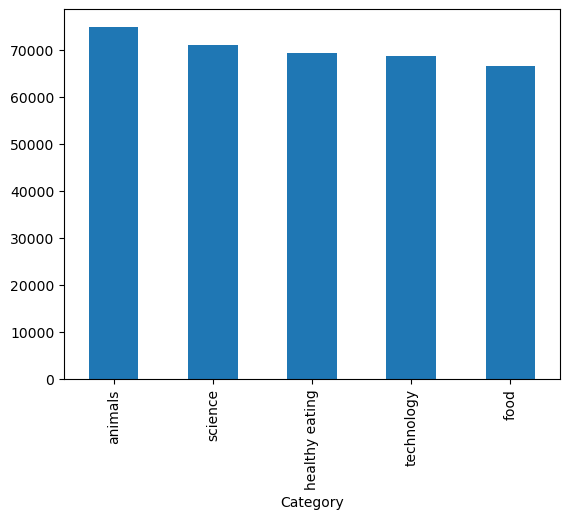

In [46]:
import matplotlib.pyplot as plt

top_5.plot(kind='bar')
#plt.plot(kind="pie",data=top_5_category)
plt.show()